In [24]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import numpy as np
import pickle
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
#Load MNIST data from tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
mnist_one_hot = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [49]:
def plot_img(image, index):
    f, ax = plt.subplots(1, len(index))
    for i in range(len(index)):
        ax[i].imshow(np.reshape(image[index[i]], (28,28)), cmap='Greys')
        ax[i].set_yticklabels([])
        ax[i].set_xticklabels([])
    plt.show()

In [50]:
class mnistTwoClassifiers(object):
    def __init__(self):
        self.step = 100
    
    def update_datasets(self, train_images, train_labels, test_images, test_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        self.test_images = test_images
        self.test_labels = test_labels
    
    def logistic_regression(self, train_size):
        self.logistic_model = LogisticRegression()
        %time self.logistic_model.fit(self.train_images[:train_size], self.train_labels[:train_size])
        return self.logistic_model
    
    def random_forest(self, train_size):
        self.random_forest_model = RandomForestClassifier()
        %time self.random_forest_model.fit(self.train_images[:train_size], self.train_labels[:train_size])
        return self.random_forest_model
        
    def test(self, test_size, classifier):
        if classifier == "logistic_regression":
            print(self.logistic_model.score(self.test_images[:test_size], self.test_labels[:test_size]))
        elif classifier == "random_forest":
            print(self.random_forest_model.score(self.test_images[:test_size], self.test_labels[:test_size]))
            
    def predict(self, model, test_images, test_size):
        return model.predict(test_images[:test_size])
        

In [51]:
train_images = mnist.train.images
train_labels = mnist.train.labels
test_images = mnist.test.images
test_labels = mnist.test.labels
two_classifiers = mnistTwoClassifiers()
two_classifiers.update_datasets(train_images, train_labels, test_images, test_labels)

In [52]:
#train the models
logistic_model = two_classifiers.logistic_regression(1000)
random_forest_model = two_classifiers.random_forest(1000)

ValueError: bad input shape (1000, 10)

CPU times: user 68 ms, sys: 0 ns, total: 68 ms
Wall time: 72 ms


In [7]:
#test the model
two_classifiers.test(1000, "logistic_regression")
two_classifiers.test(1000, "random_forest")

0.828
0.773


In [8]:
#Save classifier to pickle file
joblib.dump(logistic_model, '/tmp/logistic_regression.pkl') 
joblib.dump(random_forest_model, '/tmp/random_forest_model.pkl')

['/tmp/random_forest_model.pkl']

In [9]:
#Load classifier
logistic_clf = joblib.load('/tmp/logistic_regression.pkl')
random_forest_clf = joblib.load('/tmp/random_forest_model.pkl')

In [10]:
two_classifiers.predict(two_classifiers.logistic_model, test_images, 10)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [11]:
two_classifiers.predict(two_classifiers.random_forest_model, test_images, 10)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

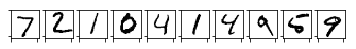

In [12]:
plot_img(test_images, range(10))

In [44]:
y_predict = logistic_clf.predict_proba(test_images[0:1])
y_predict

array([[4.78733165e-03, 3.58573116e-06, 9.69380826e-03, 3.29982600e-02,
        1.89466464e-05, 1.38744954e-03, 8.93244964e-06, 9.49662332e-01,
        8.48113130e-04, 5.91240917e-04]])

In [56]:
y_true = mnist_one_hot.test.labels[0:1]
y_true

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [60]:
loss = log_loss(y_true, y_predict)
loss

0.05164879791121333

In [62]:
loss_log = logistic_clf.predict_log_proba(test_images[0:1])
loss_log

array([[ -5.34178209, -12.53854815,  -4.63626792,  -3.41130045,
        -10.87388361,  -6.58028808, -11.62581988,  -0.0516488 ,
         -7.07249652,  -7.43328698]])

In [42]:
grads = tf.gradients(loss, [x])[0]
signs = tf.sign(grads)
epsilon = tf.constant(0.25)
x_adversarial = tf.add(tf.multiply(epsilon, signs), x)

array([[4.78733165e-03, 3.58573116e-06, 9.69380826e-03, 3.29982600e-02,
        1.89466464e-05, 1.38744954e-03, 8.93244964e-06, 9.49662332e-01,
        8.48113130e-04, 5.91240917e-04]])

In [87]:
predictions = y_predict
error = predictions - y_true
gradient = np.dot(train_images[0:1].T, error)
gradient /= len(train_images[0:1])
gradient.shape
gradient = gradient.T

In [88]:
gradient.shape

(10, 784)

In [90]:
grad = tf.placeholder([10,784])
#grad = tf.case(gradient, tf.float32)

TypeError: Expected DataType for argument 'dtype' not [10, 784].

In [83]:
signs = tf.sign(gradient)
epsilon = tf.constant(0.25)
x_adversarial = tf.add(tf.multiply(epsilon, signs), x)

TypeError: Input 'y' of 'Mul' Op has type float64 that does not match type float32 of argument 'x'.

[]

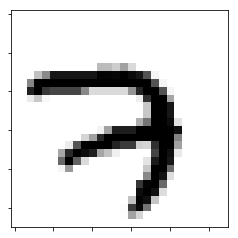

In [77]:
f, ax = plt.subplots(1, 1)
ax.imshow(np.reshape(gradient[0], (28,28)), cmap='Greys')
ax.set_yticklabels([])
ax.set_xticklabels([])

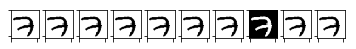

In [79]:
plot_img(gradient, range(10))

In [ ]:
# Vectorized Gradient Descent
# gradient = X.T * (X*W - y) / N
# gradient = features.T * (predictions - labels) / N

def update_weights(features, labels, weights, lr):
    '''
    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''    
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)
    
    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives -- 
    # one for each feature -- representing the aggregate 
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr
    
    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [ ]:
weights = logistic_clf.coef_
#weights = weights.T
biases = logistic_clf.intercept_
#biases = biases.T

In [ ]:
weights.shape

In [ ]:
biases.shape

In [ ]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))
                                                                                                                                                                                
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
weights[0].shape

In [ ]:
from sklearn.linear_model import SGDClassifier
def input_derivative(x, y):
    """ Calculate derivatives wrt the inputs"""
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    print("nabla b", len(nabla_b))
    print("nabla w", len(nabla_w))
    # feedforward
    activation = x
    
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        w_ = np.reshape(w, (784, 1))
        w_ = w_.T
        print("w_",w_.shape)
        print("activation",activation.shape)
        
        z = np.dot(w_, activation)+b
        
        print("z",z)

        zs.append(z)
        activation_ = sigmoid(z)
        activations.append(activation_)

    # backward pass
    clf_sgd = 
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    # Note that the variable l in the loop below is used a little
    # differently to the notation in Chapter 2 of the book.  Here,
    # l = 1 means the last layer of neurons, l = 2 is the
    # second-last layer, and so on.  It's a renumbering of the
    # scheme in the book, used here to take advantage of the fact
    # that Python can use negative indices in lists.
    for l in xrange(2, self.num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
    return self.weights[0].T.dot(delta)

In [ ]:
n=1
goal = np.zeros((10, 1))
goal[1] = 1
x = np.random.normal(.5, .3, (784, 1))
orig = np.copy(x)

for i in range(1):
    print(x.shape)
    d = input_derivative(x,goal)
    
    x -= .01 * d

In [ ]:
for l in np.xrange(2, 2):
    print(l)

In [ ]:
def adversarial(n):
    goal = np.zeros((10, 1))
    goal[n] = 1

    x = np.random.normal(.5, .3, (784, 1))
    orig = np.copy(x)
    
    print(x.shape)
    print(goal.shape)

    for i in range(10000):
        d = input_derivative(x,goal)
        x -= .01 * d

    return x